In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from scipy import special

In [116]:
currant=0.5
Lambda = 0.5


Length=20
Duration=30
Start_value=1
Theta=0.5

x_number=100
t_number=int((Lambda*Duration*x_number**2)/(Length**2*currant))
print(t_number)

750


In [94]:
x_grad=np.linspace(0,Length,x_number)
t_grad=np.linspace(0,Duration,t_number)
x_step=x_grad[1]-x_grad[0]
t_step=t_grad[1]-t_grad[0]

Explicit=Implicit=Model=np.zeros((x_number,t_number))

Explicit[:,0]=Model[:,0]=Implicit[:,0]=0
Explicit[0,:]=Model[0,:]=Implicit[0,:]=Start_value
Explicit[-1,:]=Model[-1,:]=Implicit[-1,:]=0

In [95]:
#Explicit
for t in range(0,t_number-1):
    for x in range(1,x_number-1):
        #print(Z[x][t]-Currant*(Z[x][t]-Z[x-1][t]))
        Explicit[x][t+1]=Explicit[x][t]+currant*(Explicit[x+1][t]-2*Explicit[x][t]+Explicit[x-1][t])

In [117]:
#implicit initialization
alpha=np.linspace(0,Length,x_number)
beta=np.linspace(0,Length,x_number)

alpha[:]=beta[:]=0
alpha[1]=0
beta[1]=Start_value
    
a=b=Theta*currant
c=1+2*a

In [118]:
#Implicit coefficietns
def calculate(line):
    d=(1-2*currant*(1-Theta))*line+currant*(1-Theta)*(np.roll(line,1)+np.roll(line,-1))

    for i in range(1,len(line)-1):
        alpha[i+1]=b/(c-a*alpha[i])
        beta[i+1]=(a*beta[i]+d[i])/(c-a*alpha[i])
    return alpha,beta

In [119]:
#Implicit scheme
for t in range(0,t_number-1):
    line=Implicit[:,t]
    alpha,beta=calculate(line)
    
    for i in reversed(range(0,x_number-1)):
            Implicit[x][t+1]=alpha[x+1]*Implicit[x+1][t+1]+beta[x+1]

In [99]:
#Model
for t in range(0,t_number-1):
    for x in range(0,x_number-1):
        #print(Z[x][t]-Currant*(Z[x][t]-Z[x-1][t]))
        Model[x][t+1]=Start_value*(1-special.erf(x/(2*np.sqrt(Lambda*(t+1)))))

In [100]:
def perestroyka(q,i):
    a=[]
    for f in q.tolist():
        a.append(f[i])
    a=np.array(a)
    return a

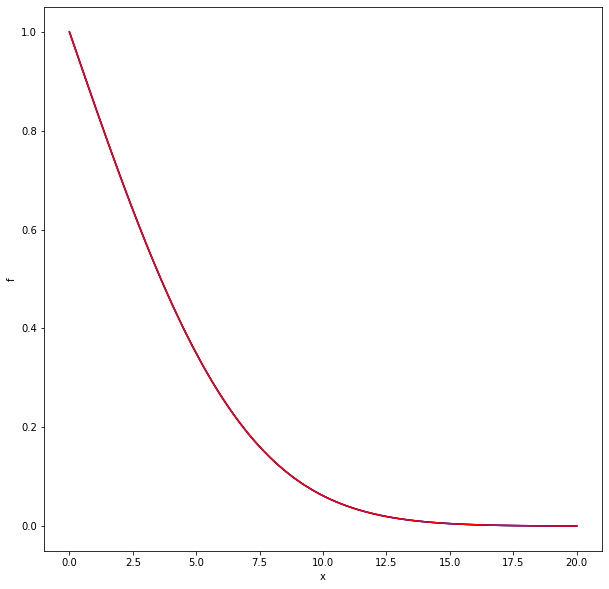

In [120]:
#chart
time=700

plt.figure(figsize=(10,10)) 
plt.ylabel('f') 
plt.xlabel('x') 
plt.plot(x_grad,perestroyka(Explicit,time),c='black') 
plt.plot(x_grad,perestroyka(Model,time),c='blue')
plt.plot(x_grad,perestroyka(Implicit,time),c='red')

plt.show()